In [19]:
# This code allows the scroll in presentation mode. Hidden content in slides view
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'scroll': True,
})

{'scroll': True}

<p style="text-align: center; font-size:350%" > BIENVENIDOS </p>

<div> <img src="images/magia_keras(1).png" height="75%" align="center"> </div>



## ¿Qué vamos a hacer?
<img src="./images/doing.png" width="73%" align="center">  

## ¿Qué es keras?
<img src="./images/kerasbackend.png" width="60%" align="center">  

## El Workflow de trabajo

<img src="./images/ml-workflow.png" width="60%" align="center">  


<img src="./images/1-WKFLOW.png" width="60%" align="center">  


## La importancia de los datos

* Obtener/Procesar datos ocupan gran parte del tiempo!
* Los datos son la base del aprendizaje
* Unos datos de calidad alta, sin imágenes emborronadas -> facilita entrenamiento
* No podemos enseñar algo de lo que no tenemos datos


## Para ello necesitamos... 
<div> <img src="images/folder_distribution.png" width="65%" align="center"> </div>

<div style="display: flex; width:'10%' flex-wrap: wrap;"> 
<img src="images/513.jpg" style="flex-basis:10%">
<img src="images/533.jpg" style="flex-basis:10%">

</div> 


<div style="display: flex; width:'10'%' flex-wrap: wrap;"> 
<img src="images/1072.jpg" style="flex-basis:10%">
<img src="images/1641.jpg" style="flex-basis:10%">

</div>

In [1]:
train_path = 'dataset/train'
test_path = 'dataset/test'

batch_size = 32
image_size = (180,180)

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import Sequence


# para entrenar
aug_train = ImageDataGenerator(validation_split=0.15)

train_generator = aug_train.flow_from_directory(directory=train_path,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='binary',
                                                subset="training")

valid_generator = aug_train.flow_from_directory(directory=train_path,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='binary',
                                                subset="validation")

Using TensorFlow backend.


Found 20380 images belonging to 2 classes.
Found 3595 images belonging to 2 classes.


In [3]:
train_batches = round(train_generator.samples/batch_size)
valid_batches = round(valid_generator.samples/batch_size)

In [16]:
# para testear
aug_test = ImageDataGenerator()
test_generator = aug_test.flow_from_directory(directory=test_path,
                                              target_size=image_size,
                                              batch_size=100,
                                              class_mode='binary')

test_batches = round(test_generator.samples/batch_size)

Found 1000 images belonging to 2 classes.


<img src="./images/2-WKFLOW.png" width="60%" align="center">  

## Keras nos ayuda a aumentar el dataset ...

In [21]:
# para entrenar
aug_train = ImageDataGenerator(rotation_range=10,
                               horizontal_flip=True,
                               vertical_flip=True,
                               zoom_range=0.3,
                               validation_split=0.10)

aug_train_generator = aug_train.flow_from_directory(directory=train_path,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset="training",
                                                save_to_dir='dataset/augmented',
                                                save_prefix='aug')

Found 21579 images belonging to 2 classes.


In [22]:
x, y = aug_train_generator.next()
y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

<div style="display: flex; width:'100%' flex-wrap: wrap;"> 
<img src="images/aug_173.png" style="flex-basis:30%">
<img src="images/aug_1396.png" style="flex-basis:30%">
<img src="images/aug_212.png" style="flex-basis:30%">
</div> 

<img src="./images/3-Workflow.png" width="60%" align="center">  

## La importancia de definir el problema
* El tipo de datos
* La distribución de los datos.
* Es importante usar cada métrica para cada problema
* Qué tipo de problema y cómo afrontarlo (clasificación o regresión, por ejemplo)
* Topología de la red
* ...

## Nuestro modelo

Nuestra red es una red de convolucion (Convolutional Neural Network - CNN)

* Lo podemos definir nosotros mismos.
* Podemos usar un modelo ya definido.
    


<div> <img src="images/imagenet_vgg16.png" width="65%" align="center"> </div>

https://tensorspace.org/html/playground/alexnet.html

In [7]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.models import Sequential

conv_model = Sequential()

# The first set of CONV => RELU =
conv_model.add(Conv2D(20, (3, 3), padding="same",
                      input_shape=(image_size[0], image_size[1], 3)))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))

# The set of FC => RELU layers
conv_model.add(Flatten())
conv_model.add(Dense(20))
conv_model.add(Activation("relu"))

# The softmax classifier
conv_model.add(Dense(1))
conv_model.add(Activation("softmax"))

In [8]:
for layer in conv_model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7f2e50fd2630> True
<keras.layers.core.Activation object at 0x7f2e50d73c50> True
<keras.layers.pooling.MaxPooling2D object at 0x7f2e50fd2ac8> True
<keras.layers.convolutional.Conv2D object at 0x7f2e50fd2b70> True
<keras.layers.core.Activation object at 0x7f2e50c58208> True
<keras.layers.pooling.MaxPooling2D object at 0x7f2e50f5db00> True
<keras.layers.convolutional.Conv2D object at 0x7f2e50f5d710> True
<keras.layers.core.Activation object at 0x7f2e50f5da90> True
<keras.layers.pooling.MaxPooling2D object at 0x7f2e50e517f0> True
<keras.layers.convolutional.Conv2D object at 0x7f2e50e51fd0> True
<keras.layers.core.Activation object at 0x7f2e6a835320> True
<keras.layers.pooling.MaxPooling2D object at 0x7f2e50a51ac8> True
<keras.layers.convolutional.Conv2D object at 0x7f2e50a51278> True
<keras.layers.core.Activation object at 0x7f2e50a51a58> True
<keras.layers.pooling.MaxPooling2D object at 0x7f2e50ec5fd0> True
<keras.layers.core.Flatten object a

In [9]:
# Resumen de nuestro modelo
print(conv_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 180, 20)      560       
_________________________________________________________________
activation_1 (Activation)    (None, 180, 180, 20)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 20)        3620      
_________________________________________________________________
activation_2 (Activation)    (None, 90, 90, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 20)        3620      
__________

## Para usar un modelo ya definido ..

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=True)

# 14,197,122 images

<img src="./images/4-WKFLOW.png" width="60%" align="center">  

In [10]:
from keras import models, optimizers


sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
conv_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

## ¿Os parece poco?
Con keras puedes entrenar el modelo...

In [12]:
# Momento de entrenar el modelo
history = conv_model.fit_generator(generator=train_generator,
                                          epochs=5, 
                                          steps_per_epoch=50, 
                                          verbose=1,
                                          callbacks=None,
                                          validation_data=valid_generator,
                                          validation_steps=valid_batches)

Epoch 1/5
50/50 [==============================] - 65s 1s/step - loss: 8.0808 - acc: 0.4931 - val_loss: 7.9734 - val_acc: 0.4999
Epoch 2/5
50/50 [==============================] - 79s 2s/step - loss: 8.3698 - acc: 0.4750 - val_loss: 7.9779 - val_acc: 0.4996
Epoch 3/5
50/50 [==============================] - 79s 2s/step - loss: 8.1505 - acc: 0.4888 - val_loss: 7.9869 - val_acc: 0.4990
Epoch 4/5
50/50 [==============================] - 72s 1s/step - loss: 8.1107 - acc: 0.4913 - val_loss: 7.9801 - val_acc: 0.4994
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 7.8516 - acc: 0.5075 - val_loss: 7.9555 - val_acc: 0.5010


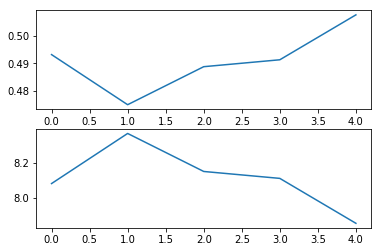

In [14]:
from matplotlib import pyplot as plt

plt.figure()
plt.subplot(211)
plt.plot(history.history['acc'])
plt.subplot(212)
plt.plot(history.history['loss'])

plt.show()

In [17]:
# Predecimos en el conjunto de test
test_hist = conv_model.evaluate_generator(generator=test_generator,
                                          steps=round(test_generator.samples/100),)

In [18]:
test_loss = test_hist[0]
test_acc = test_hist[1]

print(test_loss, test_acc)

7.971192312240601 0.5


<img src="./images/5-WKFLOW.png" width="60%" align="center">  

## Entrenar un modelo lleva muuuucho tiempo

Es importante GUARDAR LOS MODELOS (pesos, compilador, ...)

Los modelos los puedes volver a cargar y...
* ... y seguir entrenando.
* ... y testear con nuevos datos.
* ... y no tener que volver a entrenar.
* ... y obtener métricas, info, etc..


## ¿Cómo nos puede ayudar keras?
# Callbacks!

In [ ]:
from keras import callbacks

# Gardar los modelos
checkpointer = callbacks.ModelCheckpoint(filepath='/tmp/weights.hdf5',
                                         verbose=1,
                                         save_best_only=True)

# Early Stopping
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        patience=3,
                                        restore_best_weights=False)

# Tensor Board
tboard = callbacks.TensorBoard(log_dir='./logs',
                               histogram_freq=0,
                               batch_size=batch_size,
                               write_graph=True,
                               update_freq='epoch')


In [ ]:
loss, accuracy = conv_model.fit_generator(generator=train_generator,
                                          epochs=1, 
                                          steps_per_epoch=train_batches, 
                                          verbose=1,
                                          callbacks=[checkpointer, earlystopping, tboard],
                                          validation_data=valid_generator,
                                          validation_steps=valid_batches)

# GRACIAS
<img src="images/end.jpg" width="95%" >


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.models import Sequential

conv_model = Sequential()

# The first set of CONV => RELU =
conv_model.add(Conv2D(20, (3, 3), padding="same", input_shape=(image_size[0], image_size[1], 3)))
conv_model.add(Activation("relu"))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(20, (3, 3), padding="same"))
conv_model.add(Activation("relu"))

# The second set of 54 => RELU => POOL layers
conv_model.add(Conv2D(15, (3, 3), padding="same"))
conv_model.add(Activation("relu"))

# The second set of CONV => RELU => POOL layers
conv_model.add(Conv2D(15, (3, 3), padding="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# The set of FC => RELU layers
conv_model.add(Flatten())
conv_model.add(Dense(50))
conv_model.add(Activation("relu"))

# The set of FC => RELU layers
conv_model.add(Dense(20))
conv_model.add(Activation("relu"))

# The softmax classifier
conv_model.add(Dense(1))
conv_model.add(Activation("softmax"))